### Importing the dependencies (the libraries)

In [8]:
import numpy as np #helps working with arrays (the data)
import pandas as pd #used to create dataframes for data analysis and processing
import matplotlib.pyplot as plt #used to create plots and graphs
import seaborn as sns #used to visualize data, just like matplotlib
from sklearn.model_selection import train_test_split #splits data into training and testing data automatically
from sklearn.ensemble import RandomForestClassifier #importing Random Forest from sklearn
from sklearn.linear_model import LogisticRegression #importing Logistic Regression from sklearn
from sklearn.metrics import accuracy_score #to find out how well our model is performing

### Data Collection

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [12]:
#copying the csv file to the pandas dataframe by copying path
#let's name the dataframa as dataset
dataset=pd.read_csv('./winequality-red.csv')

In [13]:
#lets find the shape of our dataset matrix
#.shape function is not to be used with brackets
dataset.shape

(1599, 12)

In [14]:
#the .head() function gives the first 5 values in the dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
#check for any missing values in the dataset
#use .isnull().sum()
dataset.isnull().sum()
#we see there are no missing values, we are good to go now

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Visualization

In [16]:
#statistical measures of the dataset
#use the .describe() function
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Correlation

We are mostly concerned about the "quality" attribute of the data. For this, it is essential to find the correlation between all the physiochemical attributes to the quality attribute. Now, this correlation can be of either of the following two types:
1. Positive Correlation: As the value of the attribute increases, the quality also increases.
2. Negative Correlation: As the value of the attribute increases, the quality decreases.

In [17]:
#we define a variable to store the correlation matrix
correlation = dataset.corr()

<Axes: >

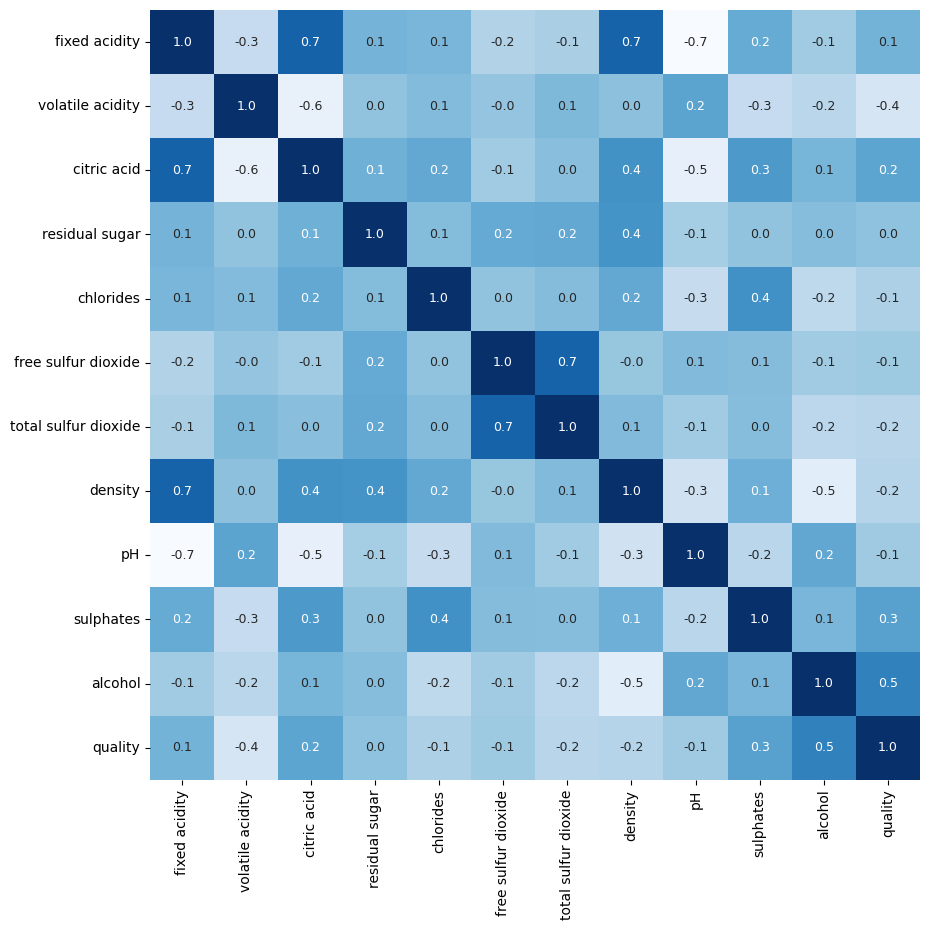

In [18]:
#constructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=False, square=True, fmt='0.1f', annot= True, annot_kws={'size':9}, cmap='Blues')
#the cbar attribute gives whether or not we want a colorbar there or not. The darkest shade will imply maximum correlation
#the square attribute is used to specify that we want all these blocks presented as squares in a grid
#the fmt specifies the maximum rounding point value of the correlation
#the annot specifies whether or not we want labels to the heatmap or not
#the annot_kws{'size'} has been used to specify a size to our correlation numbers

We can see now which columns are positively correlated and which columns are negatively correlated, and what factors affect the quality the most, for example 'alcohol' has the highest positive correlation with quality and 'volatile acidity' has the highest negative correlation with quality.

### Data Preprocessing

Firstly, we separate the attribute "quality" from the dataset. We then binarize the data within the quality attribute such that it's either 0 or 1: 0 for low quality and 1 for high quality. 

In [19]:
#dropping an attribute off the dataset and putting the new dataset in another variable
X=dataset.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [20]:
#Label Binarization of the attribute "quality"
#We want quality values less than 6 to be considered bad and greater than 6 to be good
#for this we use the lambda function from python
Y=dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


We will now split the data into train and test data using the sklearn function. This would require us to create four variables. We also want 20% of our available data to be used for testing.

In [21]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
#here, test_size=0.2 signified that 20% of our current data is used for testing
#random_state?
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599, 11) (1279, 11) (320, 11)
(1599,) (1279,) (320,)


### Model 1: Random Forest Classifier

Random Forest model is an "ensemble" model. It's essentially multiple decision treees merged together to get a result that is an average of the results produced by all the decision trees.

In [22]:
model = RandomForestClassifier() #this will load the randomtrainingclassifier model to our 'model' variable

In [23]:
#training the model using .fit() function
model.fit(X_train,Y_train)
#the 'model' variable is trained now

RandomForestClassifier()

Model Evaluation and Accuracy

In [24]:
#Model Accuracy on Test Data
#we create a variable X_test_predictions that stores the predicted 'quality' value for the X_test data
X_test_predictions = model.predict(X_test)
#we will now find the accuracy in percentage of the predictions using the accuracy_score function by comparing our predicted X_test_predictions with the correct Y_test data
model_accuracy= accuracy_score(X_test_predictions,Y_test)
print('Accuracy: ',model_accuracy)

Accuracy:  0.934375


Building a predictive system

We are writing a code for when if the model is fed every physiochemical attribute except quality, the model predicts the quality by itself. 

In [25]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5) #this piece of data is taken straight from the dataset
#this csv data is converted to a mathematically usable array using np.asarray
arr_input_data = np.asarray(input_data)
#this array has to be further reshaped so that the ml model only predicts for 1 specific instance and not look for 1599 values in the data
reshaped_input_data = arr_input_data.reshape(1,-1)
prediction = model.predict(reshaped_input_data)
print(prediction)
if (prediction==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The accuracy of this model is 93%.

### Model 2: Logistic Regression

In [26]:
model2 = LogisticRegression() #this will load the Logistic Regression model to our model2 variable

In [33]:
#training the model using .fit() function
model2.fit(X_train,Y_train)
#the 'model2' variable is trained now

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation and Accuracy

In [35]:
#Model Accuracy on Test Data
#we create a variable X_test2_predictions that stores the predicted 'quality' value for the X_test data
X_test2_predictions = model2.predict(X_test)
#we will now find the accuracy in percentage of the predictions using the accuracy_score function by comparing our predicted X_test2_predictions with the correct Y_test data
model_accuracy2= accuracy_score(X_test2_predictions,Y_test)
print('Accuracy: ',model_accuracy2)

Accuracy:  0.8875


Building a predictive system

We are writing a code for when if the model is fed every physiochemical attribute except quality, the model predicts the quality by itself. 

In [36]:
#input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5) #this piece of data is taken straight from the dataset
#this csv data is converted to a mathematically usable array using np.asarray
#arr_input_data = np.asarray(input_data)
#this array has to be further reshaped so that the ml model only predicts for 1 specific instance and not look for 1599 values in the data
#reshaped_input_data = arr_input_data.reshape(1,-1)
prediction2 = model2.predict(reshaped_input_data)
print(prediction2)
if (prediction2==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The accuracy of this model is 88.8%.

Clearly, our Random Forest Classifier performed better than our Logistic Regression model for the same problem, although both models performed quite satisfactorily.